170498071/170498071 [==============================] - 4s 0us/step
Train: X=(50000, 32, 32, 3), y=(50000, 1)
Test: X=(10000, 32, 32, 3), y=(10000, 1)


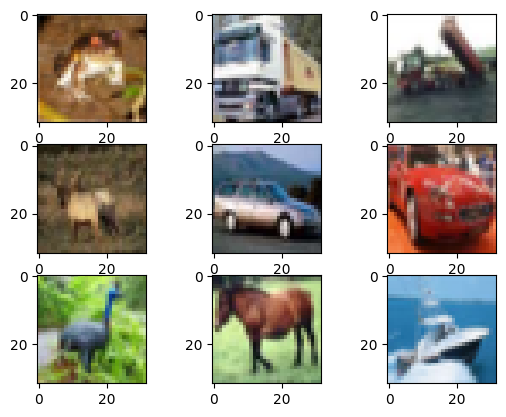

In [ ]:
# example of loading the cifar10 dataset
from matplotlib import pyplot
from keras.datasets import cifar10
# load dataset
(trainX, trainy), (testX, testy) = cifar10.load_data()
# summarize loaded dataset
print('Train: X=%s, y=%s' % (trainX.shape, trainy.shape))
print('Test: X=%s, y=%s' % (testX.shape, testy.shape))
# plot first few images
for i in range(9):
 # define subplot
 pyplot.subplot(330 + 1 + i)
 # plot raw pixel data
 pyplot.imshow(trainX[i])
# show the figure
pyplot.show()

In [ ]:
from keras.utils import to_categorical
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

x_train = x_train / 255.0
x_test = x_test / 255.0

print(y_train.shape)

y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

print(x_train.shape)
print(x_test.shape)
#print(y_train.shape)
print(y_test)

(50000, 1)
(50000, 32, 32, 3)
(10000, 32, 32, 3)
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 1. 0. 0.]]


In [ ]:
from matplotlib import pyplot
from keras.datasets import cifar10
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers import Dropout
from keras.optimizers import SGD

model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(32, 32, 3)))
model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.2))
model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.2))
model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.2))
model.add(Flatten())
model.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))
model.add(Dropout(0.2))
model.add(Dense(10, activation='softmax'))
# compile model
opt = SGD(lr=0.001, momentum=0.9)
model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

KeyboardInterrupt: ignored

In [ ]:
# Baseline + Increasing Dropout + Data Augmentation + Batch Normalization
from matplotlib import pyplot
from keras.datasets import cifar10
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers import Dropout
from keras.optimizers import SGD
from keras.layers import BatchNormalization
from keras.preprocessing.image import ImageDataGenerator

model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(32, 32, 3)))
model.add(BatchNormalization())
model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.2))
model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(BatchNormalization())
model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.3))
model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(BatchNormalization())
model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.4))
model.add(Flatten())
model.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))
# compile model
opt = SGD(lr=0.001, momentum=0.9)
model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()


datagen = ImageDataGenerator(width_shift_range=0.1, height_shift_range=0.1, horizontal_flip=True)
# prepare iterator
it_train = datagen.flow(x_train, y_train, batch_size=64)
# fit model
steps = int(x_train.shape[0] / 64)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 32)        896       
                                                                 
 batch_normalization (Batch  (None, 32, 32, 32)        128       
 Normalization)                                                  
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 32)        9248      
                                                                 
 batch_normalization_1 (Bat  (None, 32, 32, 32)        128       
 chNormalization)                                                
                                                                 
 max_pooling2d (MaxPooling2  (None, 16, 16, 32)        0         
 D)                                                              
                                                        

In [ ]:
#history = model.fit(x_train, y_train, epochs=350, batch_size=64, validation_data=(x_test, y_test), verbose=1)
history = model.fit_generator(it_train, steps_per_epoch=steps, epochs=150, validation_data=(x_test, y_test), verbose=1)

Epoch 1/150


<ipython-input-4-3ac2a1975c7e>:2: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(it_train, steps_per_epoch=steps, epochs=150, validation_data=(x_test, y_test), verbose=1)


781/781 [==============================] - 52s 49ms/step - loss: 1.6850 - accuracy: 0.3919 - val_loss: 1.6637 - val_accuracy: 0.4132
Epoch 2/150
781/781 [==============================] - 34s 44ms/step - loss: 1.3382 - accuracy: 0.5146 - val_loss: 1.3029 - val_accuracy: 0.5404
Epoch 3/150
781/781 [==============================] - 33s 42ms/step - loss: 1.1780 - accuracy: 0.5790 - val_loss: 1.0560 - val_accuracy: 0.6335
Epoch 4/150
781/781 [==============================] - 34s 43ms/step - loss: 1.0680 - accuracy: 0.6214 - val_loss: 0.8974 - val_accuracy: 0.6820
Epoch 5/150
781/781 [==============================] - 33s 43ms/step - loss: 0.9854 - accuracy: 0.6522 - val_loss: 1.0114 - val_accuracy: 0.6513
Epoch 6/150
781/781 [==============================] - 34s 44ms/step - loss: 0.9233 - accuracy: 0.6761 - val_loss: 0.8177 - val_accuracy: 0.7172
Epoch 7/150
781/781 [==============================] - 35s 45ms/step - loss: 0.8652 - accuracy: 0.6981 - val_loss: 0.8130 - val_accuracy: 0.72

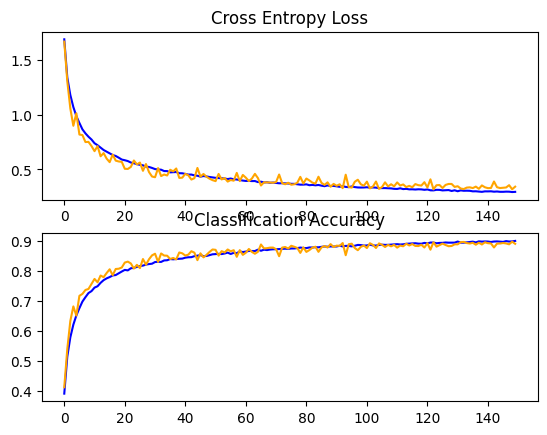

In [ ]:
import matplotlib.pyplot as plt
# plot loss
plt.subplot(211)
plt.title('Cross Entropy Loss')
plt.plot(history.history['loss'], color='blue', label='train')
plt.plot(history.history['val_loss'], color='orange', label='test')
# plot accuracy
plt.subplot(212)
plt.title('Classification Accuracy')
plt.plot(history.history['accuracy'], color='blue', label='train')
plt.plot(history.history['val_accuracy'], color='orange', label='test')

In [ ]:
#model.save('VGG_dropout.h5')
model.save('VGG_dropout_augm_batch.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
_, acc = model.evaluate(x_test, y_test, verbose=1)

313/313 [==============================] - 1s 4ms/step - loss: 0.3429 - accuracy: 0.8901


In [ ]:
print('> %.3f' % (acc * 100.0))

> 89.010


In [ ]:
!pip install ludwig

In [ ]:
!mkdir -p content
!wget -nc -O /content/home_rentals.csv https://www.dropbox.com/scl/fi/gy2682i66a8l2tqsowm5x/home_rentals.csv?rlkey=e080k02rv5205h4ullfjd

--2023-11-06 04:33:44--  https://www.dropbox.com/scl/fi/gy2682i66a8l2tqsowm5x/home_rentals.csv?rlkey=e080k02rv5205h4ullfjd
Resolving www.dropbox.com (www.dropbox.com)... 162.125.8.18, 2620:100:6016:18::a27d:112
Connecting to www.dropbox.com (www.dropbox.com)|162.125.8.18|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [text/html]
Saving to: ‘/content/home_rentals.csv’

/content/home_renta     [ <=>                ]  73.33K  --.-KB/s    in 0.09s   

2023-11-06 04:33:44 (834 KB/s) - ‘/content/home_rentals.csv’ saved [75085]



In [ ]:
!pip install ray

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.5/62.5 MB 9.7 MB/s eta 0:00:00


In [ ]:
import logging
import pprint
import pandas as pd

#from load_util import load_mushroom_edibility
from ludwig.automl import auto_train

df = pd.read_csv('/content/home_rentals.csv')

auto_train_results = auto_train(
    dataset=df,
    target='class',
    time_limit_s=60,
    tune_for_memory=False
)

pprint.pprint(auto_train_results)

ModuleNotFoundError: ignored